In [2]:
from pathlib import Path
import itertools
import numpy as np
import matplotlib.pylab as plt
# %matplotlib nbagg
# %matplotlib inline
import h5py
import json
import pickle
import glob

## Loading files

In [6]:
file_list = []
for file in glob.glob(r"C:\LINHC\VersucheDBs\Trelleborg\2021-01-27-V24_lsa_shifted\*.h5"):
    file_list.append(file)
file_list

['C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210127_Phase_A-D_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210127_Phase_A-D_LEM2_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210201_3_Phase_B-E_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210201_3_Phase_B-E_LEM2_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210202_4_Phase_C-F_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210202_4_Phase_C-F_LEM2_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210218_5_Phase_A-D_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210218_5_Phase_A-D_LEM2_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210218_7_Phase_C-F_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDB

In [7]:
file_list_LEM1 = [f for f in file_list if 'LEM1' in f]
file_list_LEM1

['C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210127_Phase_A-D_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210201_3_Phase_B-E_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210202_4_Phase_C-F_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210218_5_Phase_A-D_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\20210218_7_Phase_C-F_LEM1_lsa_shifted.h5',
 'C:\\LINHC\\VersucheDBs\\Trelleborg\\2021-01-27-V24_lsa_shifted\\9_Phase_B-E_LEM1_lsa_shifted.h5']

In [14]:
## Read all the training data and labels from h5 files
X = []
y = []
for file in file_list_LEM1:
    filename = file.split('\\')[-1][:-3]
    if 'LEM1' in filename:
        POS = 'pos1'
        SPD = 'spd1'
        S21 = 'S21_P1_LEM1'
        T = 'k1t'
        P = 'k1p'
        F =  'k1f'
        AT = 'k1at'
        PHI = 'phi'
        IP1 = 'ip1k1'
        IP2 = 'ip2k1'
        
    f = h5py.File(file, "r")
    dataset =[]
    for i in range(121):
        dataset.append(f['liview']['s21'][i].real)
        dataset.append(f['liview']['s21'][i].imag)
    X.append(np.asarray(dataset).T)
    y.append(np.asarray(f['setup']['ip1k1']))
    
X = np.concatenate(X)
y = np.concatenate(y)
print("X: ", X.shape)
print("y: ", y.shape)

X:  (584000, 242)
y:  (584000,)


In [3]:
# json.loads(f.attrs["feature_lookup"])

In [4]:
# json.loads(f.attrs["name_lookup_rev"])

## Plots to verify the training data

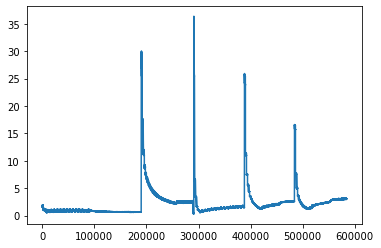

In [15]:
# plot y
plt.plot(y)

## Data preprocessing

something else for imaginary number? maybe add abs as well?

In [16]:
# split the data: training, 80%; test, 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(
#     X_t, y_t, test_size=0.2, random_state=42
# )

In [17]:
# Normalization: std, 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# following codes have the same effect
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler_t = StandardScaler()
# X_t_train_scaled = scaler_t.fit_transform(X_t_train)
# X_t_test_scaled = scaler_t.transform(X_t_test)

## Training

### Random Forest

#### for ip1k1

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_scaled, y_train) # training time for 100 trees is approx. 2 hours

RandomForestRegressor(n_estimators=10)

In [19]:
# save the file
filename = './models/rf_ip1k1_all_lsa.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [13]:
# # load the model from disk
# filename = './models/rf_ip1k1_all_lsa.pkl'
# loaded_model = pickle.load(open(filename, 'rb'))

In [20]:
rf.score(X_test_scaled, y_test)

0.589251484116939

median of the errors:  0.071316659450531


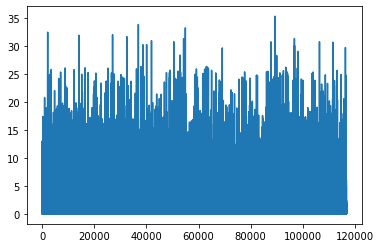

In [21]:
err = abs(rf.predict(X_test_scaled) - y_test)
print("median of the errors: ", np.median(err))
plt.plot(err)

In [28]:
# feature ranking
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_lookup_rev = {v: k for k, v in json.loads(f.attrs["feature_lookup"]).items()}
print("Feature ranking:")
for i in range(X_train_scaled.shape[1]):
    print("%d. feature %d, %s :(%f)" % 
          (i + 1, indices[i],feature_lookup_rev[indices[i]], importances[indices[i]]))

Feature ranking:
1. feature 84, s21-42-real :(0.098019)
2. feature 4, s21-2-real :(0.057613)
3. feature 5, s21-2-imag :(0.050820)
4. feature 88, s21-44-real :(0.032006)
5. feature 89, s21-44-imag :(0.019320)
6. feature 71, s21-35-imag :(0.018865)
7. feature 7, s21-3-imag :(0.017025)
8. feature 101, s21-50-imag :(0.016391)
9. feature 92, s21-46-real :(0.015756)
10. feature 93, s21-46-imag :(0.015232)
11. feature 0, s21-0-real :(0.014894)
12. feature 6, s21-3-real :(0.014473)
13. feature 11, s21-5-imag :(0.012832)
14. feature 94, s21-47-real :(0.012715)
15. feature 10, s21-5-real :(0.012159)
16. feature 100, s21-50-real :(0.012110)
17. feature 95, s21-47-imag :(0.011956)
18. feature 140, s21-70-real :(0.011879)
19. feature 141, s21-70-imag :(0.011497)
20. feature 98, s21-49-real :(0.010980)
21. feature 96, s21-48-real :(0.010295)
22. feature 97, s21-48-imag :(0.009542)
23. feature 99, s21-49-imag :(0.008683)
24. feature 1, s21-0-imag :(0.008534)
25. feature 76, s21-38-real :(0.008293)
26

<IPython.core.display.Javascript object>


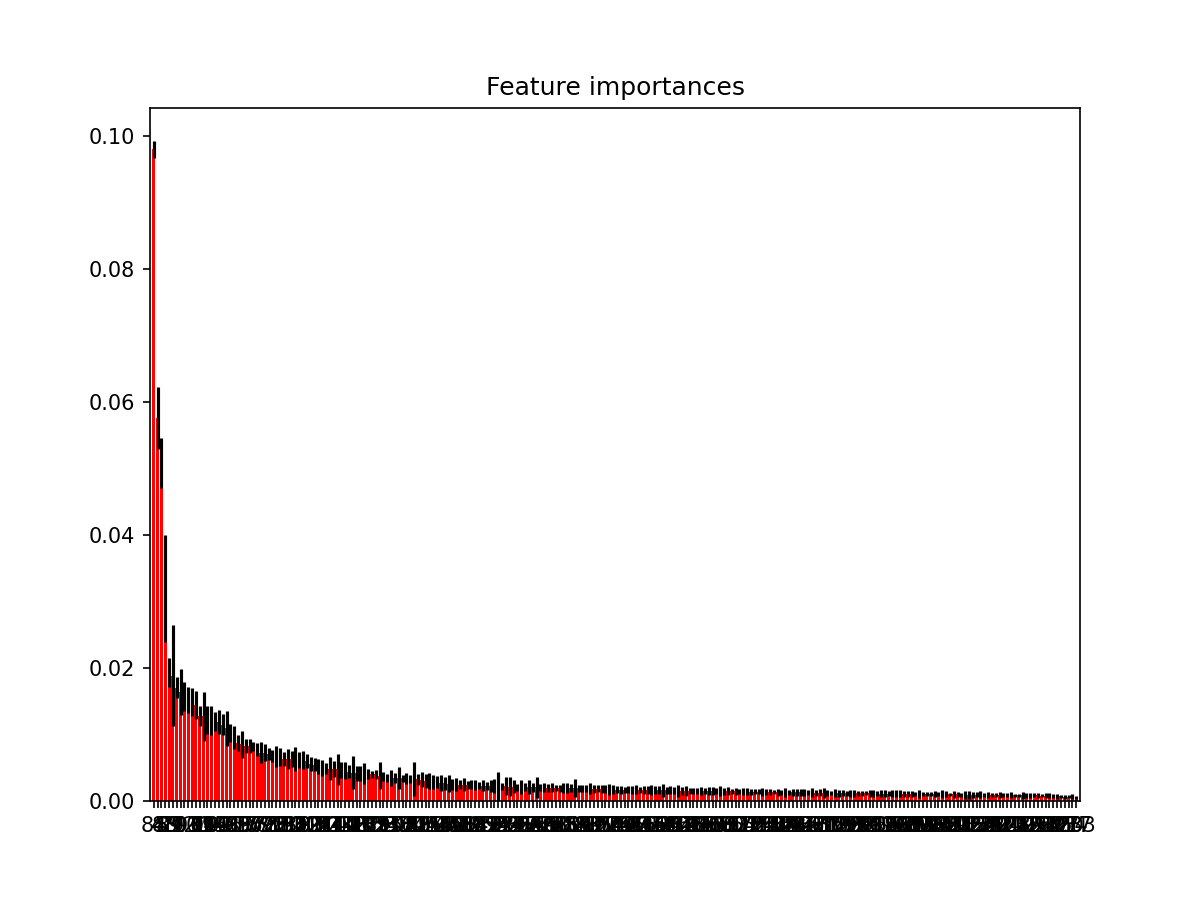

In [32]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Plot the impurity-based feature importances of the forest
%matplotlib nbagg
plt.figure(figsize = (8,6))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), indices)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

In [26]:
f.close()

<bound method File.close of <Closed HDF5 file>>

### NN